In [1]:
import pandas as pd

In [2]:
df_wine = pd.read_csv('wine.data', header=None)

In [3]:
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, t_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
sc = StandardScaler()

In [8]:
X_train_std = sc.fit_transform(X_train)

In [9]:
X_test_std = sc.transform(X_test)

In [10]:
import numpy as np

In [11]:
cov_mat = np.cov(X_train_std.T)

In [12]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

In [13]:
print('Eigenvalues\n%s' % eigen_vals)

Eigenvalues
[4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


In [14]:
tot = sum(eigen_vals)

In [15]:
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]

In [16]:
cum_var_exp = np.cumsum(var_exp)

In [17]:
import matplotlib.pyplot as plt

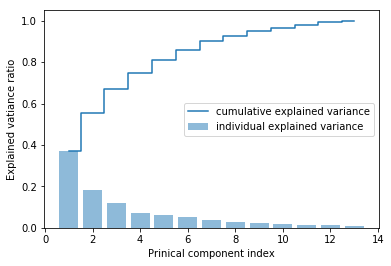

In [18]:
plt.bar(range(1, 14), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained vatiance ratio')
plt.xlabel('Prinical component index')
plt.legend(loc='best')
plt.show()

In [19]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

In [20]:
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [21]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))

In [22]:
print('Matrix W:\n', w)

Matrix W:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


In [23]:
X_train_std[0].dot(w)

array([2.38299011, 0.45458499])

In [24]:
X_train_pca = X_train_std.dot(w)

In [25]:
colors = ['r', 'b', 'g']

In [26]:
markers = ['s', 'x', 'o']

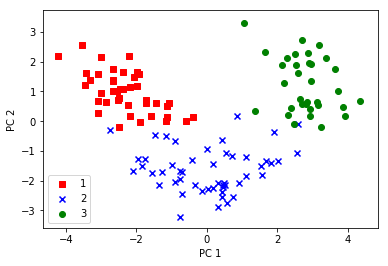

In [27]:
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0], X_train_pca[y_train==l, 1], c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()